## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [76]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [77]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [78]:
fruits.shape

(59, 7)

In [79]:
lookup_fruit_name = dict (zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create train-test split

In [91]:
X= fruits[['mass','width','height']]
y= fruits['fruit_label']

#here random_state act as seed value ,0 means 75 to 25 split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [81]:
X_train.shape

(44, 3)

In [82]:
X_test.shape

(15, 3)

In [83]:
y_train.shape

(44,)

In [84]:
y_test.shape

(15,)

In [85]:
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train,y_train, marker='o',s=40,hist_kwds={'bins':15},figsize=(12,12),cmap=cmap)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [89]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

<IPython.core.display.Javascript object>

KeyError: 'color_score'

## K Nearest- Neighbor Classification

### Create Classifier Object

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors =5 )

### Train the Classifier(fit the estimator) using the Training data

In [97]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data , using the test data

In [98]:
knn.score(X_test,y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new previously unseen objects

In [99]:
fruit_prediction =knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [75]:
fruit_prediction =knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

ValueError: query data dimension must match training data dimension

### Plot the decision boundaries of the k-NN Classifier

In [100]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

ModuleNotFoundError: No module named 'adspy_shared_utilities'

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


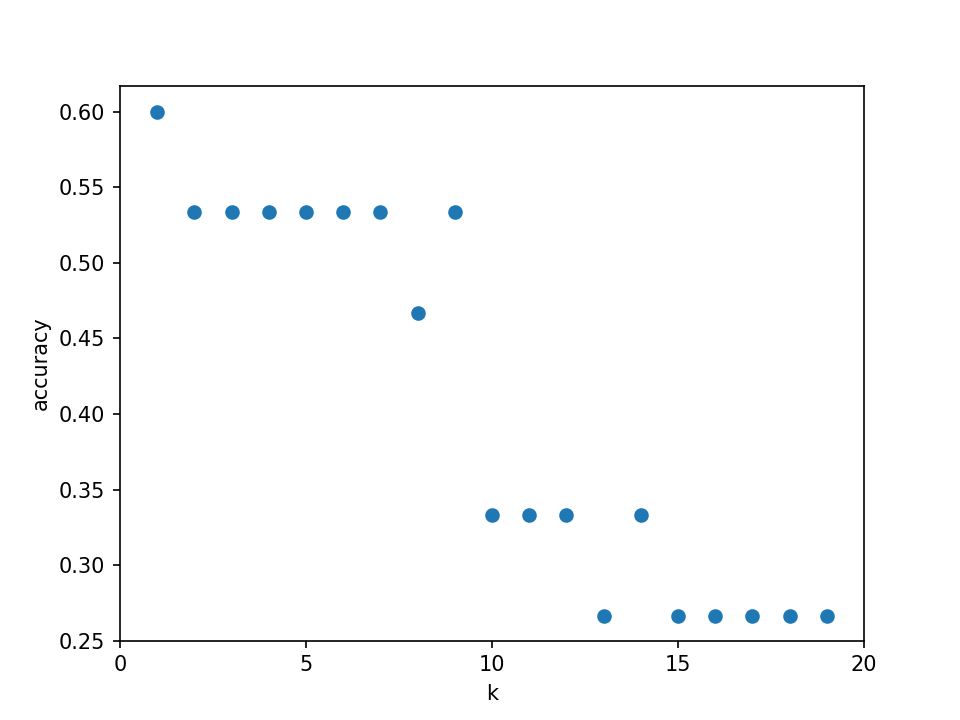

In [101]:
k_range= range(1,20)

scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


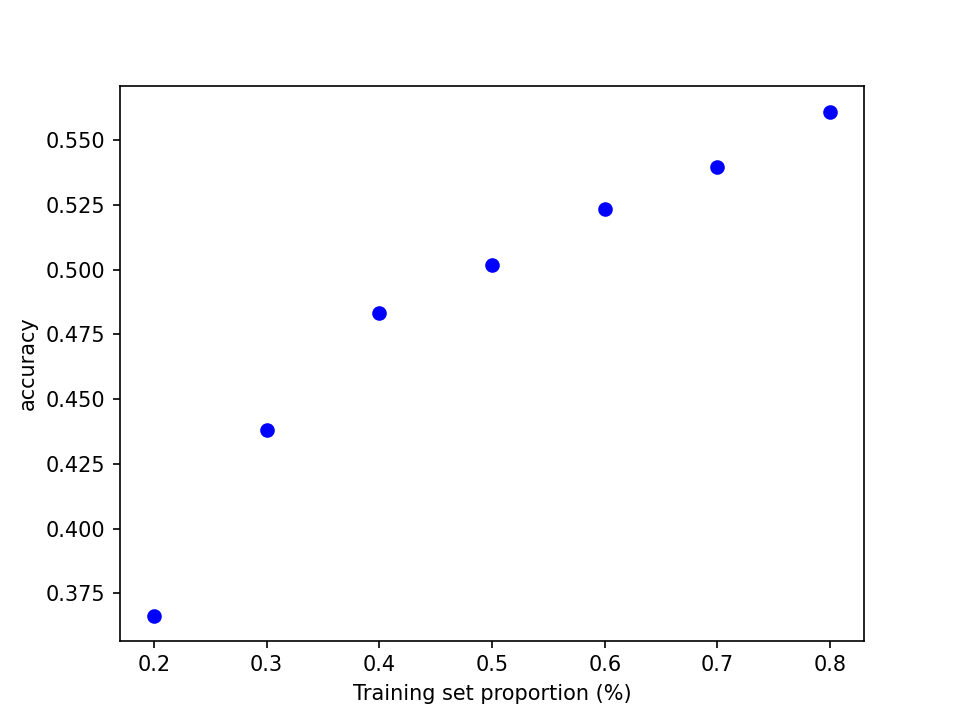

In [102]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [114]:
### Using the analysis above it is found that best k=8 and best split = 80- 20

knn = KNeighborsClassifier(n_neighbors = 5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [115]:
knn.score(X_test,y_test)

0.75